#2/26/22 **Decision Tree Classifier Building in Scikit-learn**

CART(classification and regression tree)

Decisiopn tree is a surpervised learning and can be used for both classification and regression. It uses training data to create rules that can be represented by a tree structure. It can work with both category data and numerical data. 


A regression tree is used when the dependent variable is continuous.

A classification tree is used when the dependent variable is categorical.

Advantage:

1. It is non-parametric.
2. Non-linear pattern is easy to capture.
3. Decision trees are easy to interpret and visualize.
4. It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.

Disvantage:
1. May overfit very easily.
2. small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.

Algorithm in spliting a tree:

1. Gini impurity(used very oftern)

2. Chi-Square

3. Entropy.

4. Information Gain

5. Reduction in Variance(for regression).


Parameters to be adjusted for decision trees.

https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html


## **Load libraries**

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.preprocessing import LabelEncoder#for encoding, converting catogroey variables
from sklearn.preprocessing import OrdinalEncoder # for encoding categorical features from strings to number arrays

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import plot_tree

## **First data-- sns iris data**

### **Read data**

In [ ]:
df = sns.load_dataset('iris')
df.head(10)

In [ ]:
df.info()
df.shape

In [ ]:
df.isnull().any()


In [ ]:
sns.pairplot(data=df, hue = 'species')

In [ ]:
df.corr()

In [ ]:
# correlation matrix
sns.heatmap(df.corr())

In [ ]:
#define the taget y and predictor X
target = df['species'] #target/response variable y
df1 = df.copy()
df1 = df1.drop('species', axis =1)

## Defining the attributes/predictors
X = df1

In [ ]:
target

In [ ]:
set(target.tolist()),target.unique()

#### LabelEncoder can be used to normalize labels AND used to transform non-numerical labels to numerical labels. In general, you can use ordinalencoder to encode the independent features, while LabelEncoder is mainly used for encoding the target variable.


In [ ]:
#label encoding
#
le = LabelEncoder()
target_ = le.fit_transform(target)
target_

In [ ]:
y=target_
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (120, 4)
Testing split input-  (30, 4)


In [ ]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier() #default=”gini”, max_depthint, default=None,min_samples_leaf=2
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [ ]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

###plot the confusion matrix 

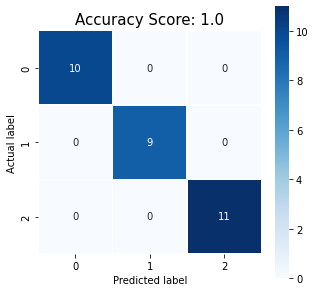

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)
plt.show()

###Visurilize the tree

In [ ]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, 
                     class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)

## **Indian Diabetes data**

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
#dat = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)
filein="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataset=pd.read_csv(filein,header=None, names=col_names)

In [ ]:
dataset.head(5)

In [ ]:
dataset.corr()

In [ ]:
dataset.info()

###Feature selection

In [ ]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = dataset[feature_cols] # Features
y = dataset.label # Target variable


###Splitting data, optimize decision tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
X_train.shape, X.shape

((537, 7), (768, 7))

### Build Decision tree

In [ ]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)
y_pred = clf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

### Evaluate the model

In [ ]:
# Model Accuracy, how often  is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
df=pd.concat([X,pd.DataFrame(y)],axis=1)

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(data=df.corr(),linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(round(clf.score(X_test, y_test),2))
plt.title(all_sample_title, size = 15)
plt.show()

### Visualizing Decision Trees

In [ ]:
from sklearn import tree
import graphviz
target_str=dataset['label'].apply(lambda x: str(x))
target = list(target_str.unique())
feature_names = list(X.columns)
dot_data = tree.export_graphviz(clf_model,
                                out_file=None, 
                      feature_names=feature_names,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.save('graph1.jpg')
graph


In [ ]:
dec_tree = plot_tree(decision_tree=clf_model, feature_names = feature_names, 
                     class_names =['0','1'], filled = True , precision = 4, rounded = True)

In [ ]:
from sklearn.tree import export_text
r = export_text(clf_model, feature_names=feature_names)
print(r)

### different criteria in spliting tree.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


##HW Practice using car data

In [ ]:
filein="https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
#download.file(url = data_url, destfile = "car.data")
df=pd.read_csv(filein, sep = ',', header = None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
target=df[6]
X=df[range(6)]
X.shape,y.shape

((1728, 6), (768,))

In [ ]:
#label encoding,Encodes target labels with values between 0 and n_classes-1
#
le = LabelEncoder()
target = le.fit_transform(target)
y=target

y

In [ ]:
#The features are converted from categorical values to ordinal integers
oe = OrdinalEncoder()
oe.fit(X)
X_enc = oe.transform(X)
X_enc
X
#Convert back to originL
X_=pd.DataFrame(oe.inverse_transform(X_enc))
X_


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.3, random_state=1) 

In [ ]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier() #default=”gini”, max_depthint, default=None,min_samples_leaf=2
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

# Predicting the values of test data
y_pred = dtree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(round(dtree.score(X_test, y_test),2))
plt.title(all_sample_title, size = 15)
plt.show()

In [ ]:
y_pred = dtree.predict(X_test)
y_pred

## **Tree Regression**

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')
X = dataset['Temperature'].values
y = dataset['Revenue'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

DecisionTreeRegressor()

In [ ]:
y_pred = regressor.predict(X_test.reshape(-1,1))
y_pred

In [ ]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

# Visualising the Decision Tree Regression Results 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()
